# Exercise 4

## Import packages

In [40]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.patches as patches

from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

## Task 1
(3 points)

Implement the training loop for one training epoch.
An epoch trains on the whole training dataset once.

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def train(model, use_cuda, train_loader, optimizer, epoch, log_interval):
    """
    Train one epoch
    
    model -- the neural network
    use_cuda -- true if GPU should be used
    train_loader -- data loader
    optimizer -- network optimizer
    epoch -- number of current epoch
    log_interval -- number of training steps between logs
    """
    print(f"Starting epoch {epoch}")  # 添加这行来确认是否进入epoch
    model.train()
    
    for batch_idx, (data, target) in enumerate(train_loader):
        if use_cuda:
            data, target = data.cuda(), target.cuda()
            
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# 示例使用
if __name__ == "__main__":
    # 创建一些示例数据
    x = torch.randn(1000, 784)  # 1000个样本，每个784维
    y = torch.randint(0, 10, (1000,))  # 1000个标签，范围0-9
    
    # 创建数据集和数据加载器
    dataset = TensorDataset(x, y)
    train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
    
    # 创建一个简单的模型
    model = nn.Sequential(
        nn.Linear(784, 128),
        nn.ReLU(),
        nn.Linear(128, 10),
        nn.LogSoftmax(dim=1)
    )
    
    # 设置优化器
    optimizer = optim.Adam(model.parameters())
    
    # 检查是否有可用的GPU
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        model = model.cuda()
    
    # 训练循环
    num_epochs = 5
    log_interval = 100
    
    for epoch in range(1, num_epochs + 1):
        train(model, use_cuda, train_loader, optimizer, epoch, log_interval)

Starting epoch 1
Train Epoch: 1 [0/1000 (0%)]	Loss: 2.265683
Starting epoch 2
Train Epoch: 2 [0/1000 (0%)]	Loss: 1.872024
Starting epoch 3
Train Epoch: 3 [0/1000 (0%)]	Loss: 1.345940
Starting epoch 4
Train Epoch: 4 [0/1000 (0%)]	Loss: 0.748238
Starting epoch 5
Train Epoch: 5 [0/1000 (0%)]	Loss: 0.389051


We already implemented the validation function for you (this is essentially validate() from the last exercise)

[INFO] 開始訓練 Epoch 1
Train Epoch: 1 [64/60000 (0%)]	Loss: 2.311041
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.463523
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.267747
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.313030
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.150737
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.117797
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.054962
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.044752
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.119533
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.057409
Train Epoch: 1 [30016/60000 (100%)]	Loss: 0.046524

Test set: Average loss: 0.0131, Accuracy: 965/10000 (9.65%)



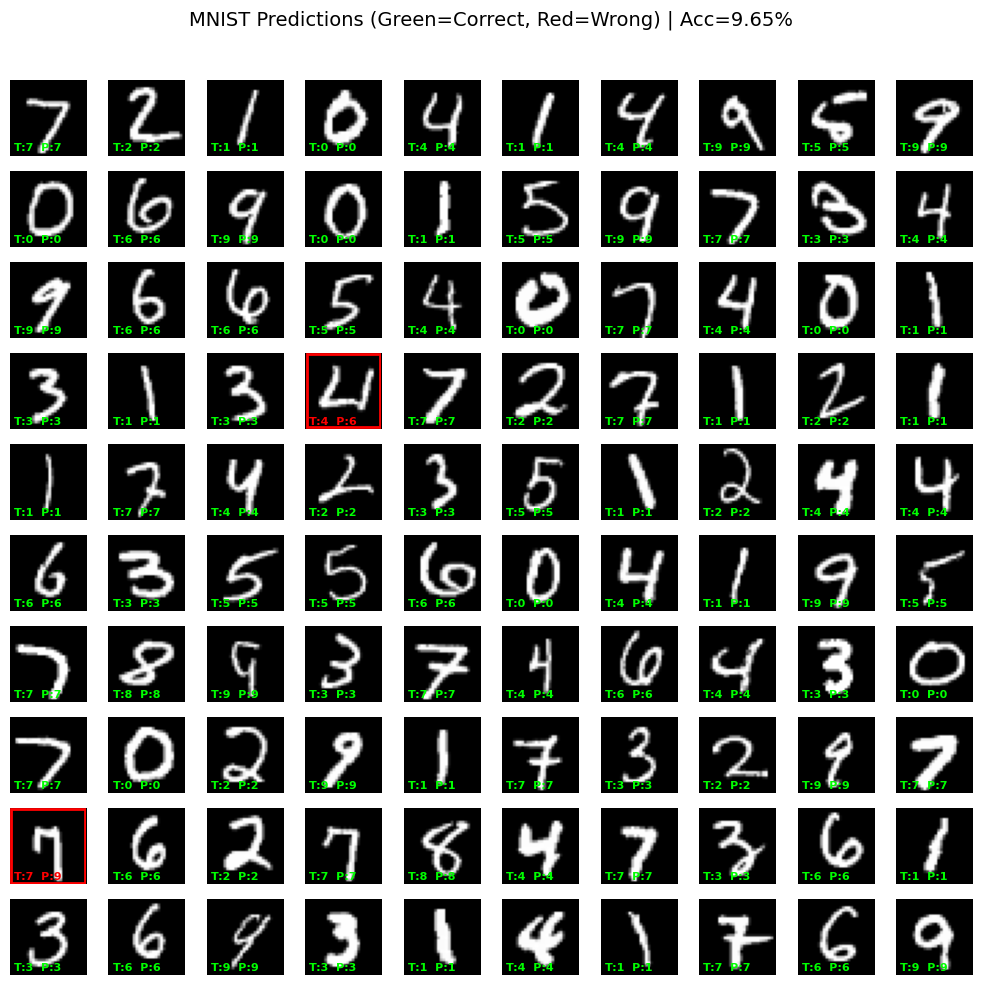

[INFO] 開始訓練 Epoch 2
Train Epoch: 2 [64/60000 (0%)]	Loss: 0.012385
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.279767
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.141534
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.022126
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.049130
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.185145
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.015770
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.002919
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.126006
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.012391
Train Epoch: 2 [30016/60000 (100%)]	Loss: 0.022094

Test set: Average loss: 0.0112, Accuracy: 969/10000 (9.69%)



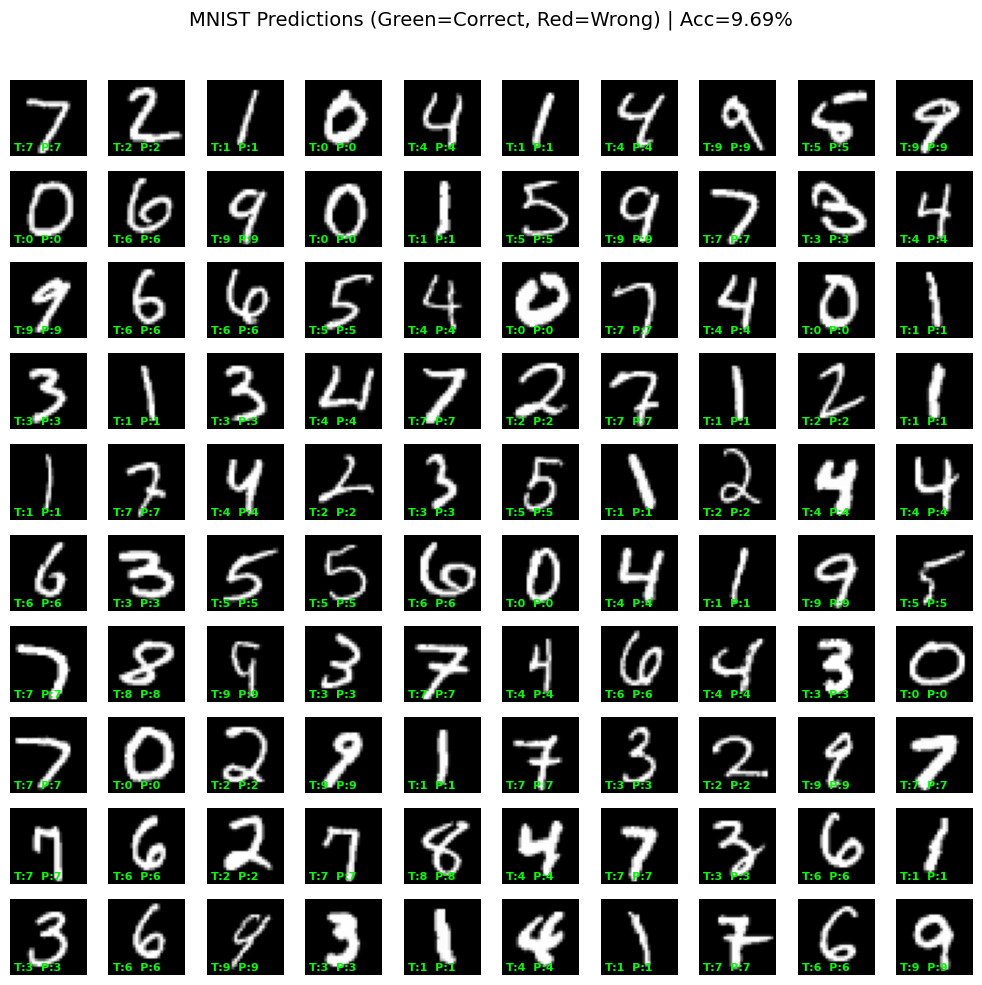

[INFO] 開始訓練 Epoch 3
Train Epoch: 3 [64/60000 (0%)]	Loss: 0.056461
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.257423
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.299013
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.068318
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.022882
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.023852
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.001258
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.032558
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.041512
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.063981
Train Epoch: 3 [30016/60000 (100%)]	Loss: 0.023372

Test set: Average loss: 0.0084, Accuracy: 976/10000 (9.76%)



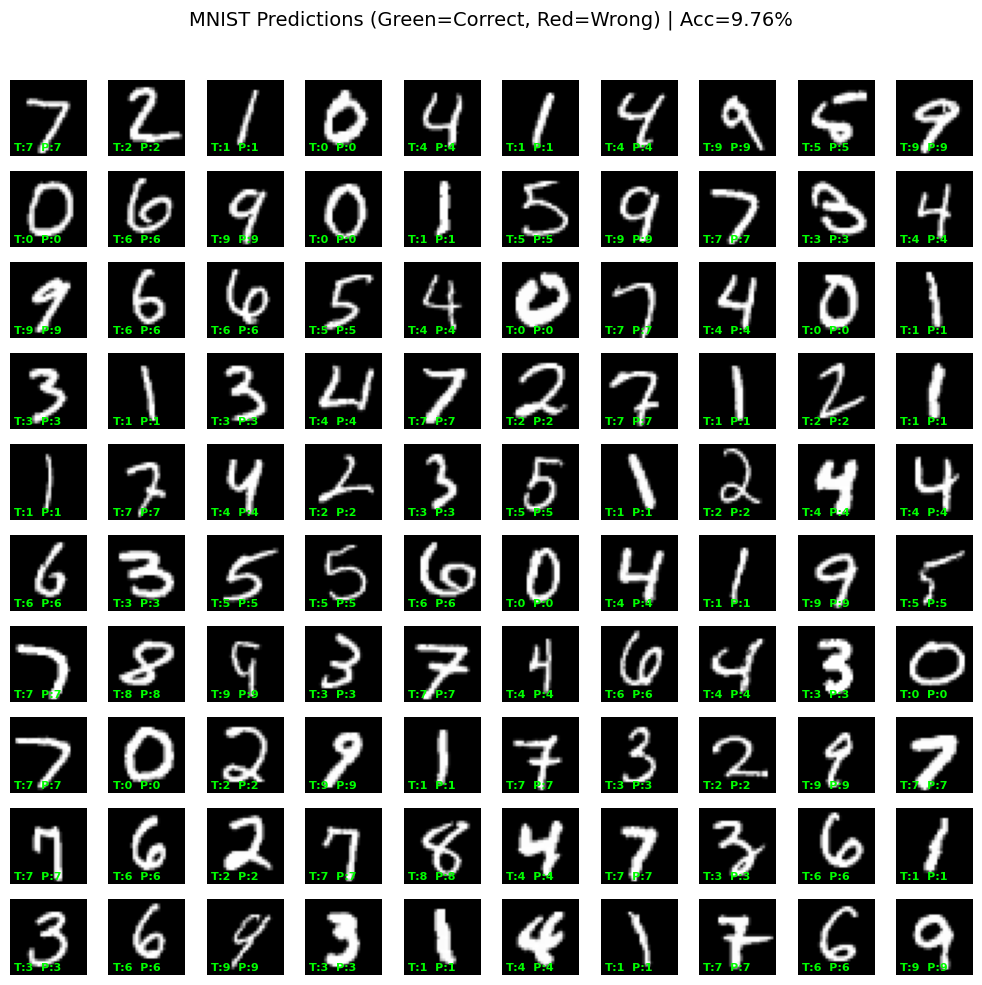

[INFO] 模型已儲存：checkpoint_fcnet2.pt


In [42]:
# === Model (Task 2: FCNet2, ReLU 版) ===
class FCNet2(nn.Module):
    # 784 -> 200 -> 100 -> 60 -> 30 -> 10（最後不做 activation，接 log_softmax）
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 60)
        self.fc4 = nn.Linear(60, 30)
        self.fc5 = nn.Linear(30, 10)

    def forward(self, x):
        # x: (B, 1, 28, 28) -> (B, 784)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)                 # logits
        return F.log_softmax(x, dim=1)  # for NLL loss

# === Task 1: Train (一定會印) ===
def train(model, use_cuda, train_loader, optimizer, epoch, log_interval):
    print(f"[INFO] 開始訓練 Epoch {epoch}")
    device = torch.device("cuda" if use_cuda and torch.cuda.is_available() else "cpu")
    model.to(device)
    model.train()

    num_batches = len(train_loader)
    dataset_size = len(train_loader.dataset)

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        # 在第1個 batch、每 log_interval 個 batch、以及最後一個 batch 都印
        if (batch_idx == 0) or ((batch_idx + 1) % log_interval == 0) or ((batch_idx + 1) == num_batches):
            seen = (batch_idx + 1) * data.size(0)
            pct = 100.0 * (batch_idx + 1) / num_batches
            print(f"Train Epoch: {epoch} [{seen}/{dataset_size} ({pct:.0f}%)]\tLoss: {loss.item():.6f}", flush=True)

# === 改良版 validate：顯示真實/預測，錯誤紅框紅字，正確綠字 ===
def validate(model, use_cuda, test_loader):
    """
    Compute test metrics and visualize predictions
    顯示每張圖的真實標籤與預測結果，錯誤的用紅色框與紅字標出
    """
    # 10x10 圖格
    fig, axis = plt.subplots(10, 10, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    device = torch.device("cuda" if use_cuda and torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    test_loss = 0.0
    correct = 0
    plotted = 0

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)

            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)  # (B,1)

            img_correct = pred.eq(target.view_as(pred))
            correct += img_correct.sum().item()

            # 取前 100 張作圖
            data_cpu = data.detach().cpu().numpy()      # (B,1,28,28)
            target_cpu = target.detach().cpu().numpy()  # (B,)
            pred_cpu = pred.detach().cpu().numpy()      # (B,1)
            correct_cpu = img_correct.detach().cpu().numpy()  # (B,1)

            for i in range(data_cpu.shape[0]):
                if plotted >= 100:
                    break

                r = plotted // 10  # row
                c = plotted % 10   # col

                img = data_cpu[i, 0]
                mn, mx = float(img.min()), float(img.max())
                img = (img - mn) / (mx - mn + 1e-12)

                ax = axis[r][c]
                ax.imshow(img, cmap='gray')
                ax.axis('off')

                gt = int(target_cpu[i])
                pd = int(pred_cpu[i, 0])
                is_correct = bool(correct_cpu[i, 0])

                txt = f"T:{gt}  P:{pd}"
                if is_correct:
                    ax.text(1, 26, txt, color='lime', fontsize=8, fontweight='bold')
                else:
                    ax.text(1, 26, txt, color='red', fontsize=8, fontweight='bold')
                    # 紅框
                    ax.add_patch(patches.Rectangle((0, 0), 27, 27, linewidth=2, edgecolor='red', facecolor='none'))

                plotted += 1

            if plotted >= 100:
                break

    test_loss /= len(test_loader.dataset)
    acc = 100.0 * correct / len(test_loader.dataset)

    print(f"\nTest set: Average loss: {test_loss:.4f}, "
          f"Accuracy: {int(correct)}/{len(test_loader.dataset)} ({acc:.2f}%)\n")

    plt.suptitle(f"MNIST Predictions (Green=Correct, Red=Wrong) | Acc={acc:.2f}%", fontsize=14)
    # 留空間給 suptitle
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# === Data & Train Loop (最穩定設定，避免 DataLoader 卡住) ===
def main():
    # 检查是否有可用的CUDA设备
    use_cuda = torch.cuda.is_available()
    kwargs = {'num_workers': 0, 'pin_memory': False}  # 避免在某些環境卡住

    batch_size = 64
    test_batch_size = 1000
    epochs = 3
    lr = 1.0
    gamma = 0.7
    log_interval = 100  # 想更頻繁看進度可改小

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    train_loader = DataLoader(
        datasets.MNIST('./data', train=True, download=True, transform=transform),
        batch_size=batch_size, shuffle=True, **kwargs
    )

    test_loader = DataLoader(
        datasets.MNIST('./data', train=False, download=True, transform=transform),
        batch_size=test_batch_size, shuffle=False, **kwargs
    )

    model = FCNet2()
    if use_cuda:
        model = model.cuda()

    optimizer = optim.Adadelta(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=gamma)

    for epoch in range(1, epochs + 1):
        train(model, use_cuda, train_loader, optimizer, epoch, log_interval)
        validate(model, use_cuda, test_loader)
        scheduler.step()

    torch.save(model.state_dict(), "checkpoint_fcnet2.pt")
    print("[INFO] 模型已儲存：checkpoint_fcnet2.pt")

if __name__ == "__main__":
    main()


## Task 2
(4 points)

Implement a five-layer fully connected neural network.
The dimensions (without batch size) should change like this: 784->200->100->60->30->10
Use log softmax to compute the class predictions.

Run the code at the end of the notebook to train and validate your implementation.

### Task 2.1
* sigmoid non-linear activation function
* note that the last layer does not need an activation function!

### Task 2.2
* add a new class "FCNet2"
* replace sigmoid with ReLU

### Task 2.3
* add a new class "FCNet2"
* add batch normalization to the first and third layers (note the difference between 1D/2D/3D versions)


**NOTE:** The perfomance should improve slightly with each step. However, due to the random weight initialization applied by PyTorch, your results may vary a bit between trainings.

In [43]:
class FCNet1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 60)
        self.fc4 = nn.Linear(60, 30)
        self.fc5 = nn.Linear(30, 10)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        x = self.fc5(x)                 # logits
        return F.log_softmax(x, dim=1)  # log-probs


In [44]:
class FCNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 60)
        self.fc4 = nn.Linear(60, 30)
        self.fc5 = nn.Linear(30, 10)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim=1)


In [45]:
class FCNet3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 200); self.bn1 = nn.BatchNorm1d(200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 60);  self.bn3 = nn.BatchNorm1d(60)
        self.fc4 = nn.Linear(60, 30)
        self.fc5 = nn.Linear(30, 10)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.fc2(x))
        x = F.relu(self.bn3(self.fc3(x)))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim=1)


## Task 3
(3 points)

Implement a convolutional neural network, consisting of two convolutional and two fully connected layers.
This time, the dimensions (without batch size) should change like this: 1x28x28->32x26x26->64x12x12->128->10

### Task 3.1
* two convolutional layers (kernel size 3)
* two fully-connected layers
* ReLU activation function

### Task 3.2
* add batch normalization to first convolutional and first fully connected layer

### Task 3.3
* use max pooling instead of stride to reduce the dimensions to 64x12x12

In [46]:

class ConvNet1(nn.Module):
    """
    Convolutional Neural Network

    Two convolutional layers and two fully connected layers

    Dimensions:
    1x28x28 -> 32x26x26 -> 64x12x12 -> 128 -> 10
    """
    def __init__(self):
        super(ConvNet1, self).__init__()

        # 初始化卷積層
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=0)  # 28->26
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=0) # 26->12

        # 初始化全連接層
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # 第一層卷積 + ReLU
        x = F.relu(self.conv1(x))   # 輸出: (B, 32, 26, 26)

        # 第二層卷積 + ReLU
        x = F.relu(self.conv2(x))   # 輸出: (B, 64, 12, 12)

        # 攤平成一維向量
        x = x.view(x.size(0), -1)   # (B, 64*12*12)

        # 第一個全連接層 + ReLU
        x = F.relu(self.fc1(x))     # (B, 128)

        # 第二個全連接層（輸出層）
        x = self.fc2(x)             # (B, 10)

        # 對每個樣本做 log softmax（方便用 NLLLoss）
        output = F.log_softmax(x, dim=1)

        return output

In [47]:
class ConvNet2(nn.Module):
    def __init__(self):
        super(ConvNet2, self).__init__()
        # 卷积层1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        # 池化层1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # 卷积层2
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        # 池化层2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Dropout层
        self.dropout = nn.Dropout(0.25)
        # 全连接层
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # 假设输入是28x28的图像
        self.fc2 = nn.Linear(128, 10)  # 10个类别

    def forward(self, x):
        # 第一个卷积块
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        # 第二个卷积块
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = self.dropout(x)
        
        # 展平特征图
        x = x.view(x.size(0), -1)
        
        # 全连接层
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        
        # 使用log_softmax进行多分类
        return F.log_softmax(x, dim=1)


In [48]:
class ConvNet3(nn.Module):
    def __init__(self):
        super(ConvNet3, self).__init__()
        # 定义卷积层
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        # 定义池化层
        self.pool = nn.MaxPool2d(2, 2)
        # 定义全连接层
        self.fc1 = nn.Linear(128 * 4 * 4, 512)  # 假设输入图像大小为32x32
        self.fc2 = nn.Linear(512, 10)  # 假设是10分类任务
        # Dropout层
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # 卷积层 + ReLU激活 + 池化
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # 展平特征图
        x = x.view(-1, 128 * 4 * 4)
        # 全连接层 + ReLU激活
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        # 输出层
        x = self.fc2(x)
        return x



[INFO] 開始訓練 Epoch 1
Train Epoch: 1 [64/60000 (0%)]	Loss: 2.299842
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.624786
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.198036
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.265356
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.281851
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.083265
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.139316
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.193776
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.164421
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.060468
Train Epoch: 1 [30016/60000 (100%)]	Loss: 0.027866

Test set: Average loss: 0.1120, Accuracy: 9634/10000 (96.34%)



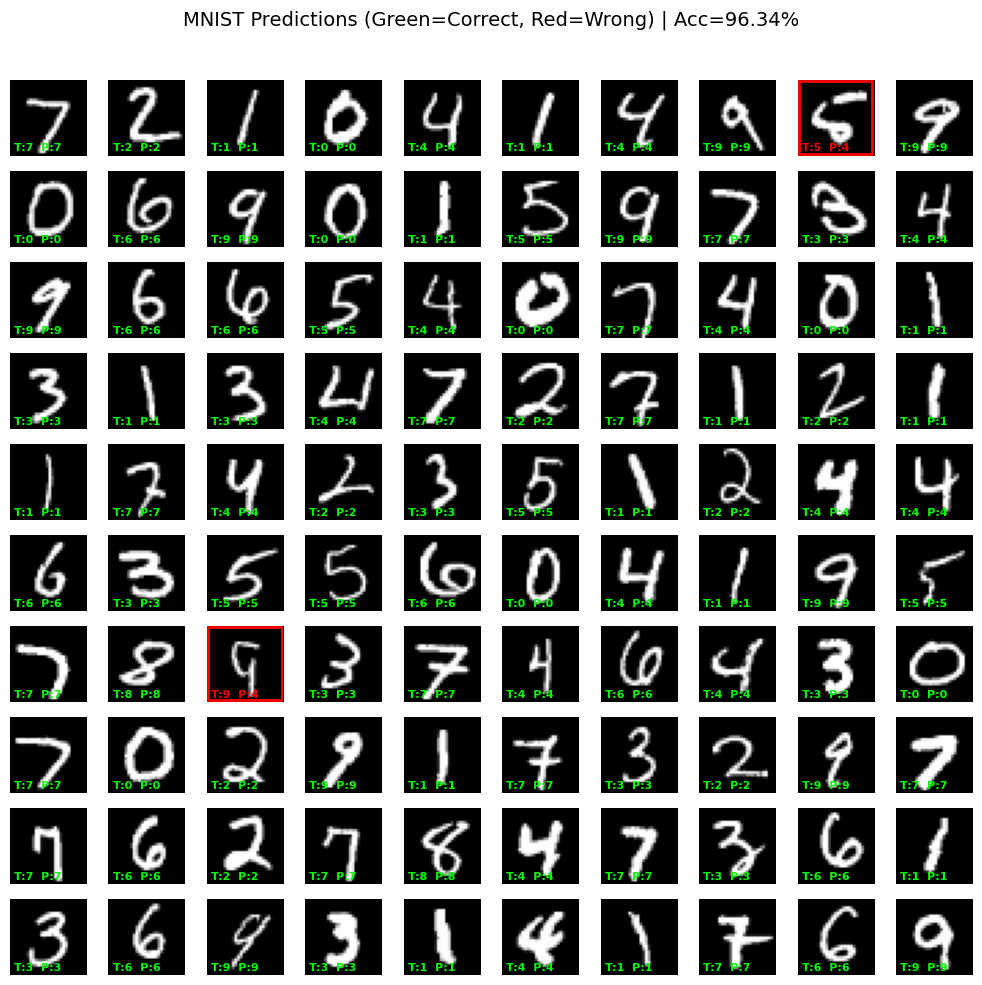

[INFO] 已儲存到 models/mnist/checkpoint.pt

[INFO] 開始訓練 Epoch 2
Train Epoch: 2 [64/60000 (0%)]	Loss: 0.101319
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.035415
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.081587
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.049866
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.007903
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.096048
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.046077
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.160244
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.211521
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.114050
Train Epoch: 2 [30016/60000 (100%)]	Loss: 0.020385

Test set: Average loss: 0.0890, Accuracy: 9741/10000 (97.41%)



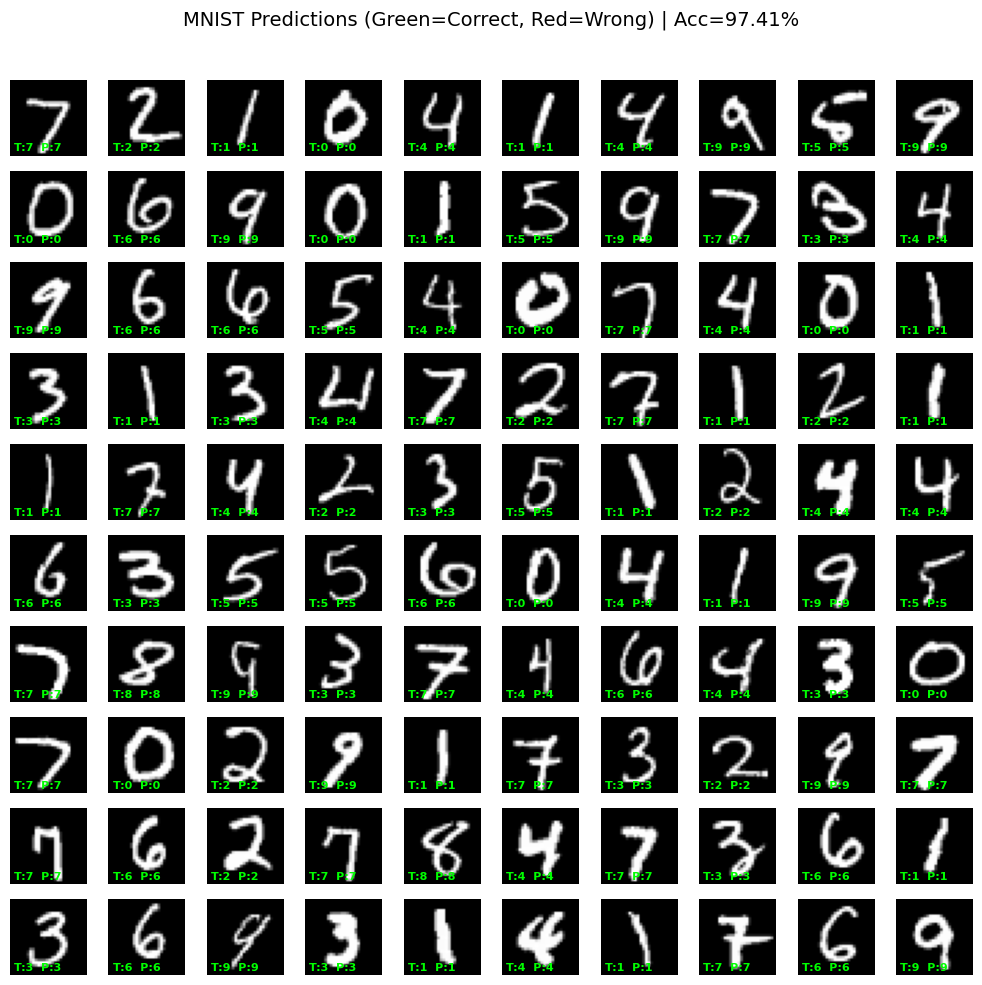

[INFO] 已儲存到 models/mnist/checkpoint.pt

[INFO] 開始訓練 Epoch 3
Train Epoch: 3 [64/60000 (0%)]	Loss: 0.189037
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.047272
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.025868
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.068067
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.232771
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.235318
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.030557
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.014855
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.095097
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.091436
Train Epoch: 3 [30016/60000 (100%)]	Loss: 0.033487

Test set: Average loss: 0.0722, Accuracy: 9801/10000 (98.01%)



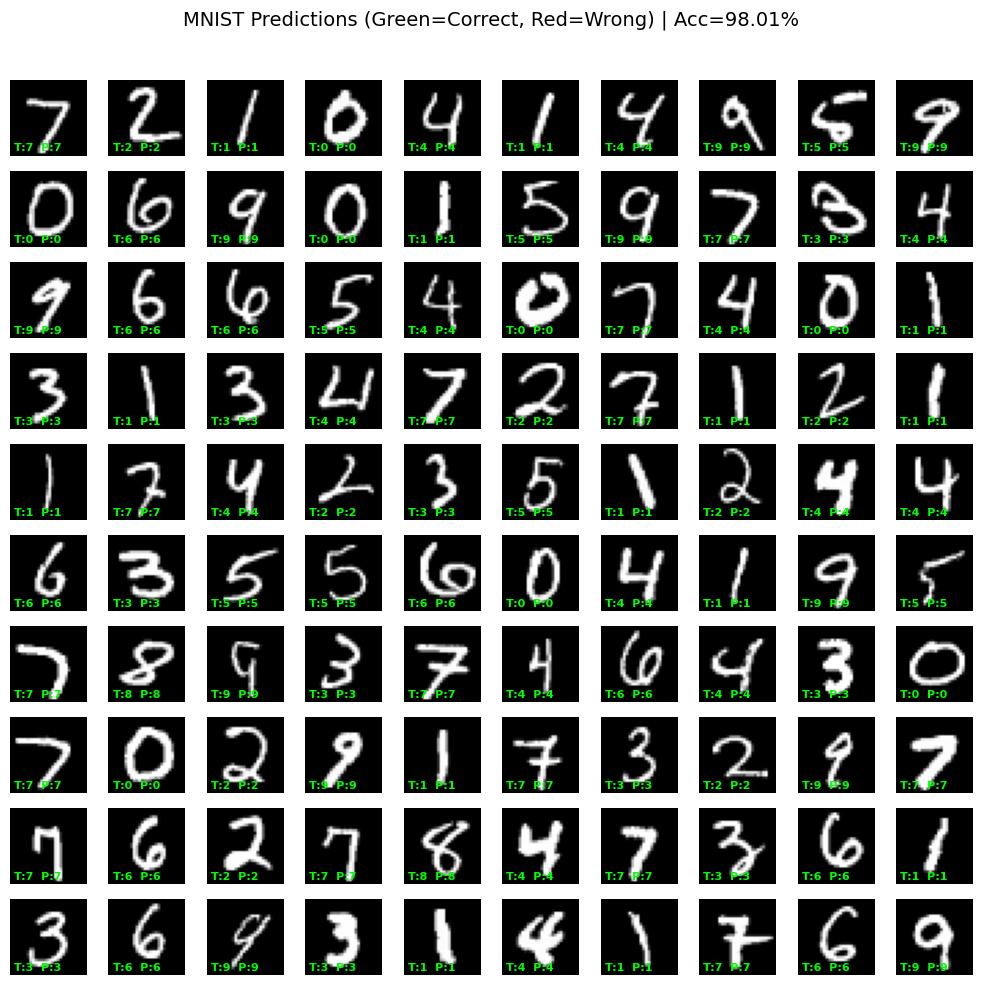

[INFO] 已儲存到 models/mnist/checkpoint.pt

[INFO] 開始訓練 Epoch 4
Train Epoch: 4 [64/60000 (0%)]	Loss: 0.010672
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.018826
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.016344
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.069431
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.006034
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.001822
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.031472
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.191352
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.081881
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.000529
Train Epoch: 4 [30016/60000 (100%)]	Loss: 0.168089

Test set: Average loss: 0.0820, Accuracy: 9792/10000 (97.92%)



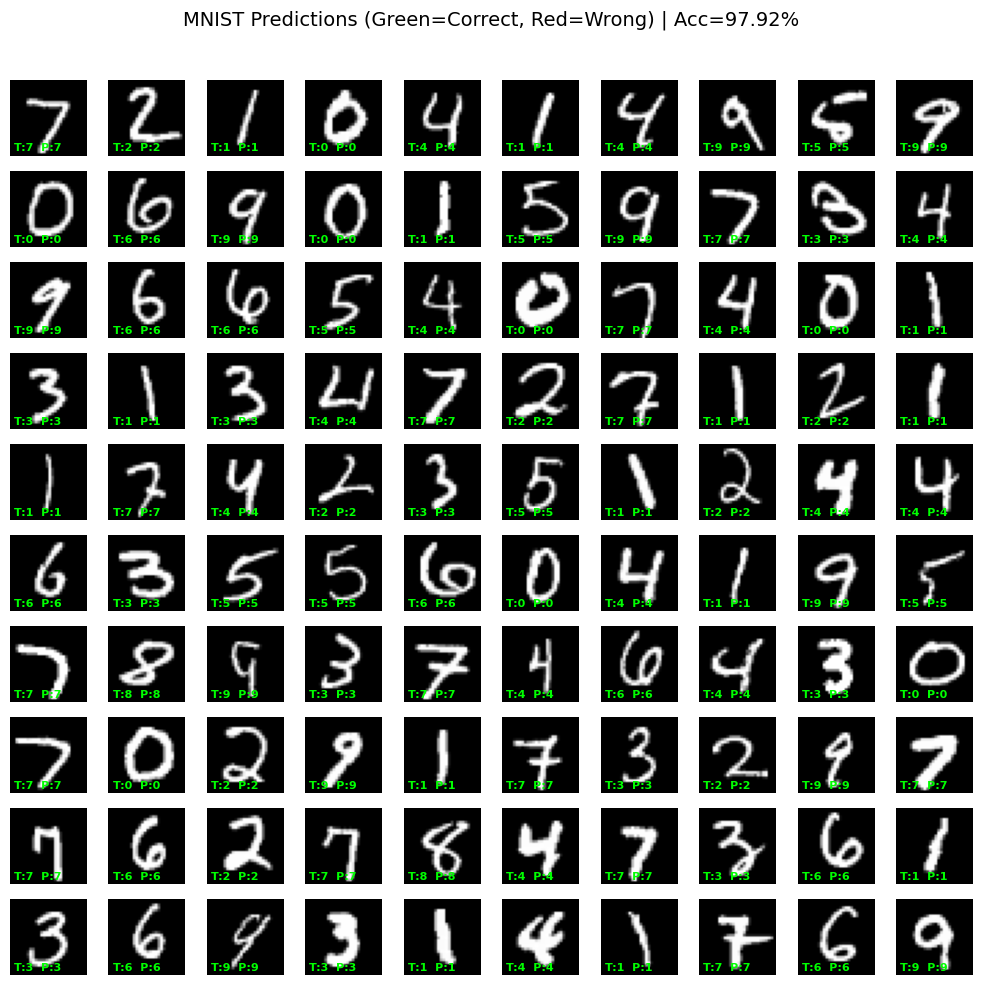

[INFO] 已儲存到 models/mnist/checkpoint.pt

[INFO] 開始訓練 Epoch 5
Train Epoch: 5 [64/60000 (0%)]	Loss: 0.140238
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.000555
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.012951
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.017715
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.000373
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.024397
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.009906
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.002414
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.001949
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.009973
Train Epoch: 5 [30016/60000 (100%)]	Loss: 0.001205

Test set: Average loss: 0.0774, Accuracy: 9810/10000 (98.10%)



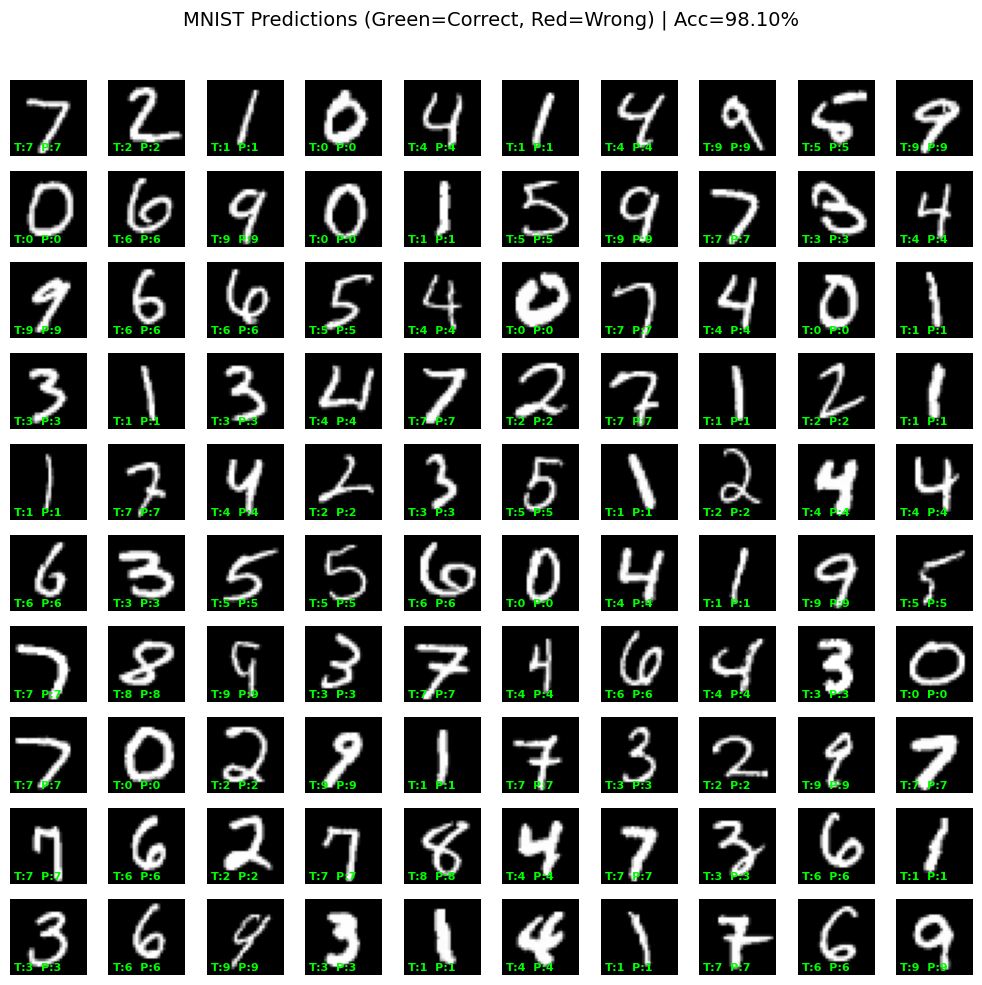

[INFO] 已儲存到 models/mnist/checkpoint.pt

[INFO] 開始訓練 Epoch 6
Train Epoch: 6 [64/60000 (0%)]	Loss: 0.063809
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.004481
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.000877
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.000148
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.006632
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.010764
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.000250
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.000409
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.001530
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.078636
Train Epoch: 6 [30016/60000 (100%)]	Loss: 0.001114

Test set: Average loss: 0.0828, Accuracy: 9809/10000 (98.09%)



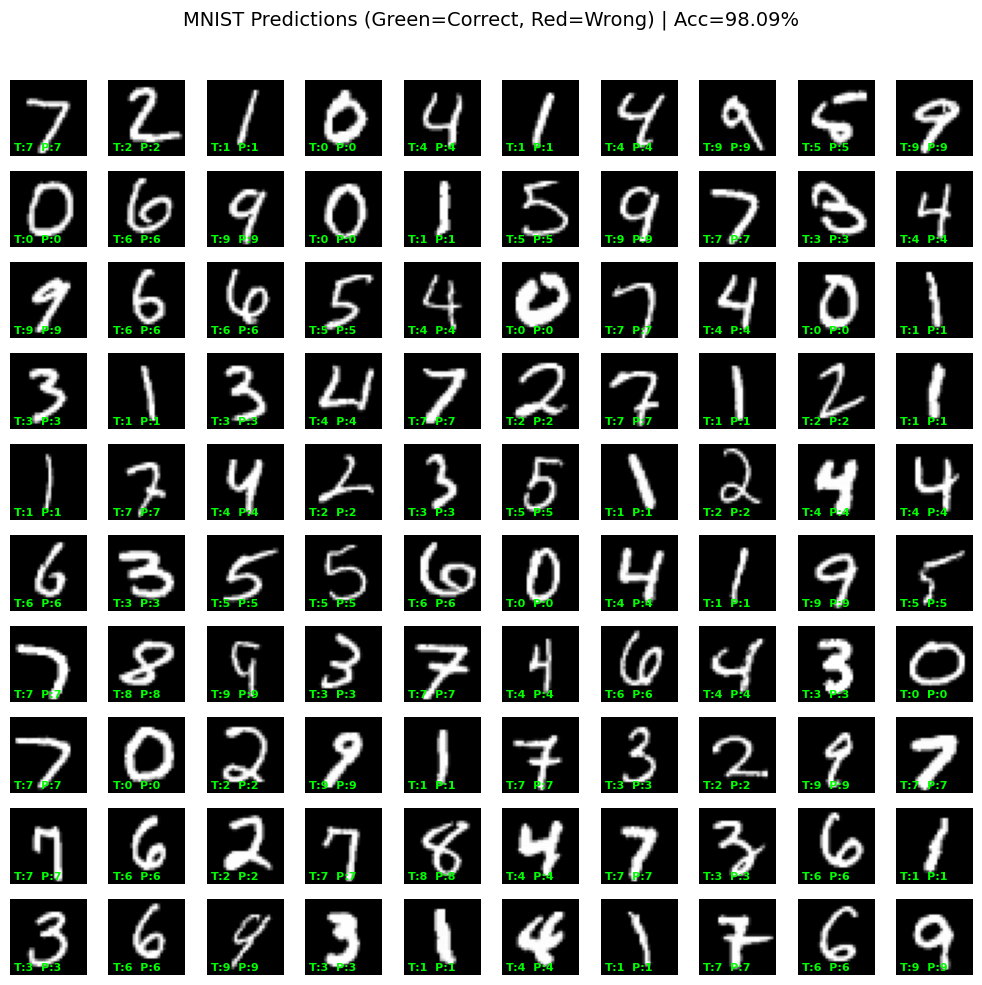

[INFO] 已儲存到 models/mnist/checkpoint.pt

[INFO] 開始訓練 Epoch 7
Train Epoch: 7 [64/60000 (0%)]	Loss: 0.007818
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.001418
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.000868
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.003412
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.003254
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.004199
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.000033
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.002067
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.002311
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.011083
Train Epoch: 7 [30016/60000 (100%)]	Loss: 0.000048

Test set: Average loss: 0.0858, Accuracy: 9807/10000 (98.07%)



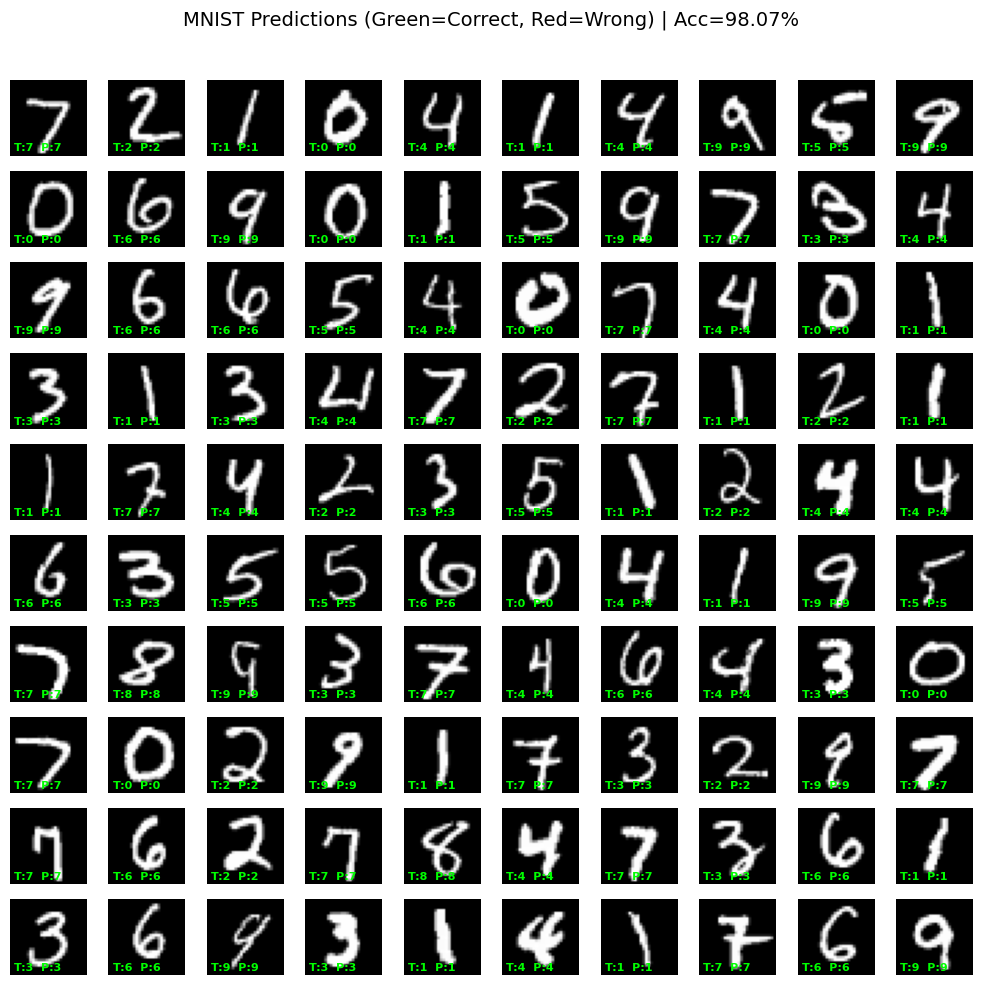

[INFO] 已儲存到 models/mnist/checkpoint.pt

[INFO] 開始訓練 Epoch 8
Train Epoch: 8 [64/60000 (0%)]	Loss: 0.001111
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.024271
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.000209
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.000224
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.008488
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.004937
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.001631
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.000923
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.000024
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.000240
Train Epoch: 8 [30016/60000 (100%)]	Loss: 0.000276

Test set: Average loss: 0.0860, Accuracy: 9807/10000 (98.07%)



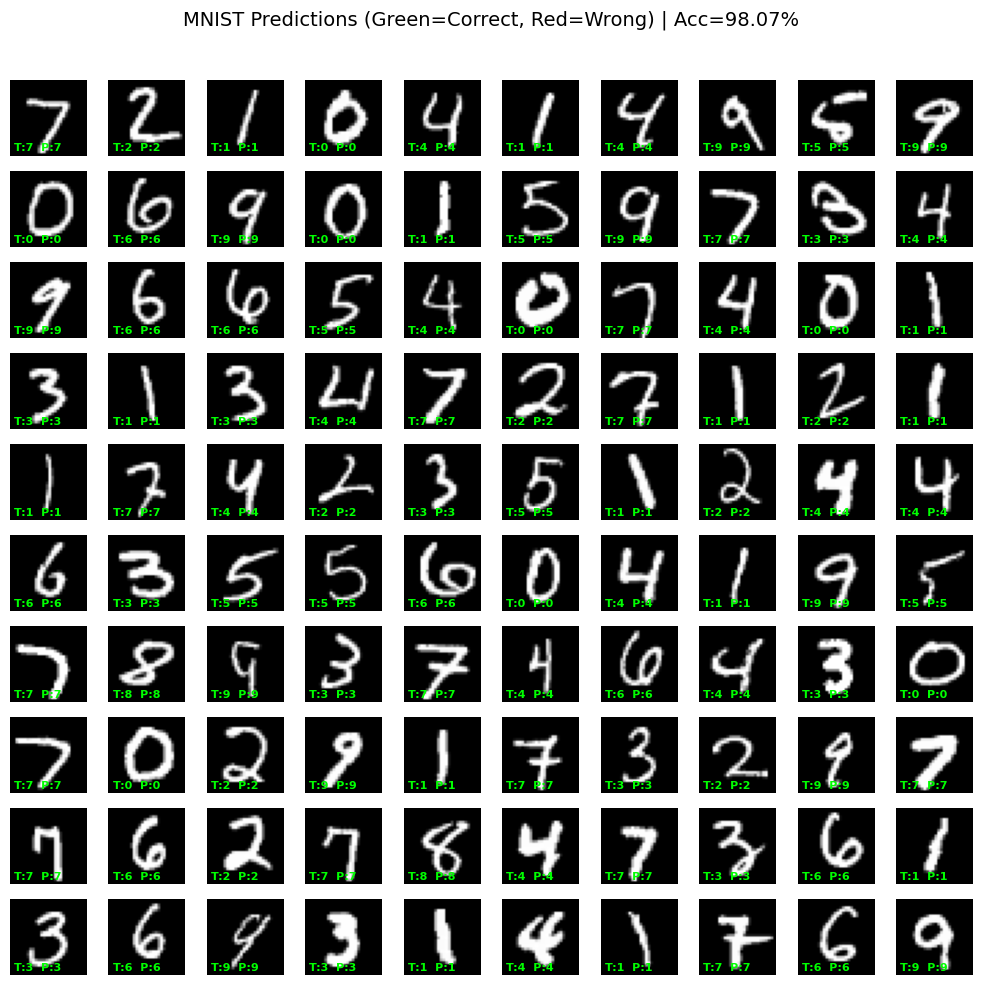

[INFO] 已儲存到 models/mnist/checkpoint.pt

[INFO] 開始訓練 Epoch 9
Train Epoch: 9 [64/60000 (0%)]	Loss: 0.000610
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.000098
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.019382
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.000257
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.000124
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.003038
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.001011
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.000055
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.006306
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.000278
Train Epoch: 9 [30016/60000 (100%)]	Loss: 0.000015

Test set: Average loss: 0.0879, Accuracy: 9816/10000 (98.16%)



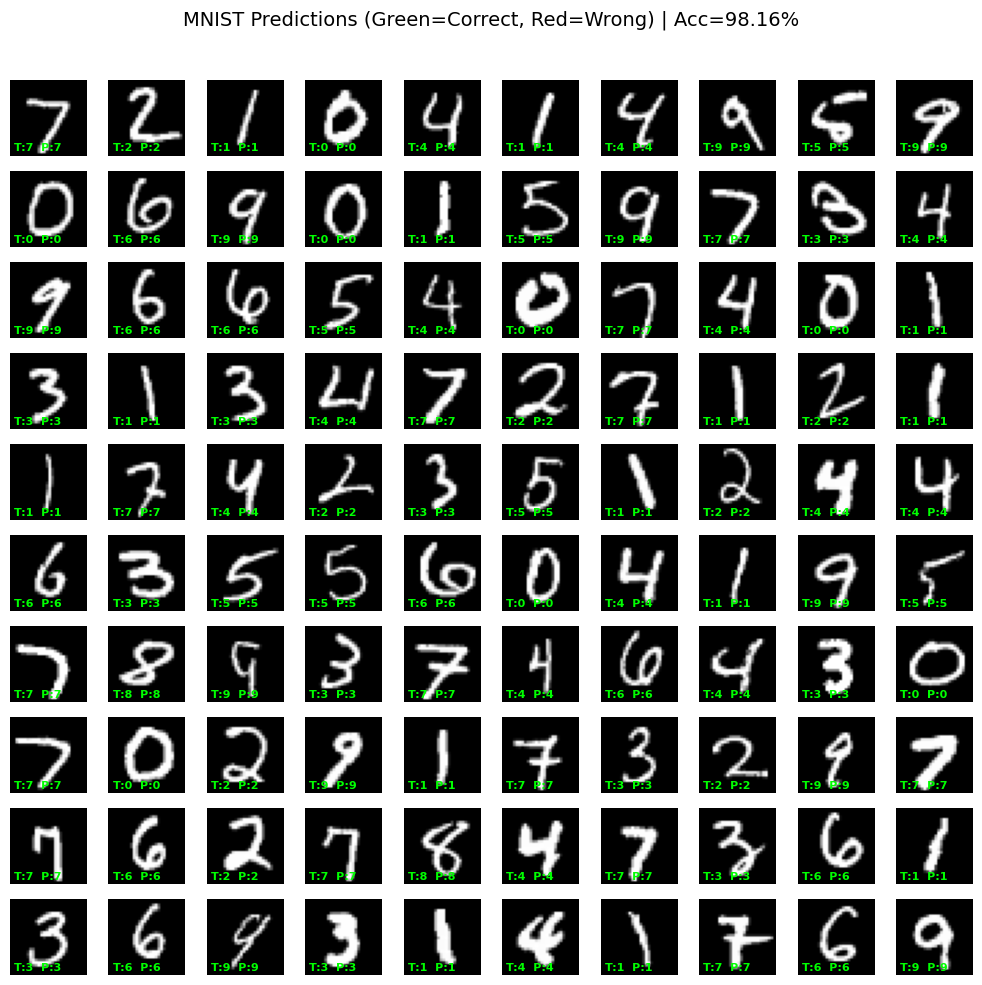

[INFO] 已儲存到 models/mnist/checkpoint.pt

[INFO] 開始訓練 Epoch 10
Train Epoch: 10 [64/60000 (0%)]	Loss: 0.001046
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.000274
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.010401
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.001177
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.001083
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.000714
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.001307
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.019463
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.000603
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.006148
Train Epoch: 10 [30016/60000 (100%)]	Loss: 0.000333

Test set: Average loss: 0.0901, Accuracy: 9815/10000 (98.15%)



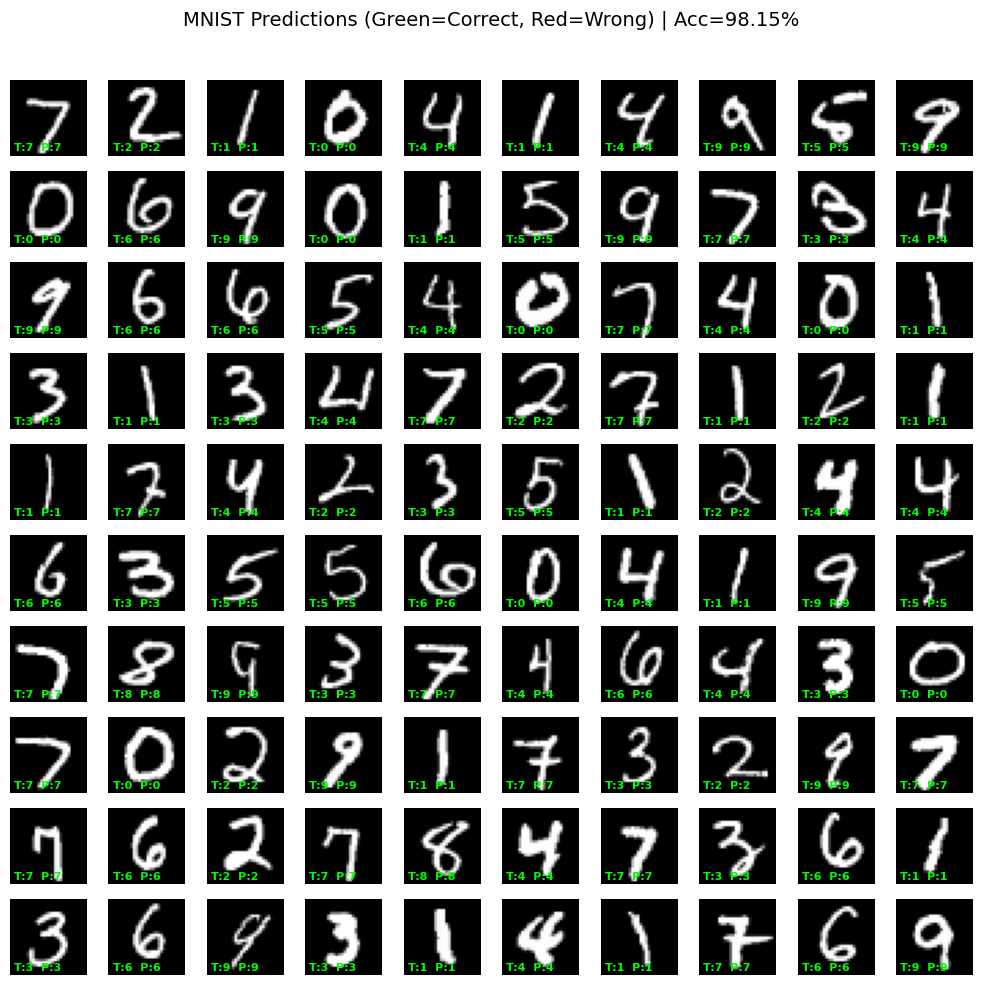

[INFO] 已儲存到 models/mnist/checkpoint.pt


In [49]:
# === model: FCNet2（ReLU 版）===
class FCNet2(nn.Module):
    # 784 -> 200 -> 100 -> 60 -> 30 -> 10
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 60)
        self.fc4 = nn.Linear(60, 30)
        self.fc5 = nn.Linear(30, 10)

    def forward(self, x):
        # MNIST 影像展平成 (B, 784)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)                 # logits
        return F.log_softmax(x, dim=1)  # for NLL loss

# === train（會固定印出進度）===
def train(model, use_cuda, train_loader, optimizer, epoch, log_interval):
    print(f"\n[INFO] 開始訓練 Epoch {epoch}")
    device = torch.device("cuda" if use_cuda and torch.cuda.is_available() else "cpu")
    model.to(device)
    model.train()

    num_batches = len(train_loader)
    dataset_size = len(train_loader.dataset)

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        # 第 1 個、每 log_interval 個、最後一個 batch 都印
        if (batch_idx == 0) or ((batch_idx + 1) % log_interval == 0) or ((batch_idx + 1) == num_batches):
            seen = (batch_idx + 1) * data.size(0)
            pct = 100.0 * (batch_idx + 1) / num_batches
            print(f"Train Epoch: {epoch} [{seen}/{dataset_size} ({pct:.0f}%)]\tLoss: {loss.item():.6f}", flush=True)

# === validate（顯示整體 loss/accuracy；前 100 張可視化，錯誤紅框紅字）===
def validate(model, use_cuda, test_loader, show_grid=True):
    device = torch.device("cuda" if use_cuda and torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    test_loss = 0.0
    correct = 0
    plotted = 0

    # 可視化：10x10 圖格
    if show_grid:
        fig, axis = plt.subplots(10, 10, figsize=(10, 10))
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)

            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            img_correct = pred.eq(target.view_as(pred))
            correct += img_correct.sum().item()

            if show_grid and plotted < 100:
                # 畫前 100 張：正確綠字；錯誤紅字 + 紅框
                data_cpu = data.detach().cpu().numpy()
                target_cpu = target.detach().cpu().numpy()
                pred_cpu = pred.detach().cpu().numpy()
                corr_cpu = img_correct.detach().cpu().numpy()
                
                for i in range(data_cpu.shape[0]):
                    if plotted >= 100:
                        break
                    r, c = divmod(plotted, 10)
                    img = data_cpu[i, 0]
                    mn, mx = float(img.min()), float(img.max())
                    img = (img - mn) / (mx - mn + 1e-12)

                    ax = axis[r][c]
                    ax.imshow(img, cmap='gray')
                    ax.axis('off')

                    gt = int(target_cpu[i]); pd = int(pred_cpu[i, 0])
                    ok = bool(corr_cpu[i, 0])
                    txt = f"T:{gt}  P:{pd}"
                    if ok:
                        ax.text(1, 26, txt, color='lime', fontsize=8, fontweight='bold')
                    else:
                        ax.text(1, 26, txt, color='red', fontsize=8, fontweight='bold')
                        ax.add_patch(patches.Rectangle((0, 0), 27, 27, linewidth=2, edgecolor='red', facecolor='none'))
                    plotted += 1

    test_loss /= len(test_loader.dataset)
    acc = 100.0 * correct / len(test_loader.dataset)
    print(f"\nTest set: Average loss: {test_loss:.4f}, "
          f"Accuracy: {int(correct)}/{len(test_loader.dataset)} ({acc:.2f}%)\n")

    if show_grid:
        plt.suptitle(f"MNIST Predictions (Green=Correct, Red=Wrong) | Acc={acc:.2f}%", fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

# === 您的模板部分 ===
# hyper parameters
batch_size = 64
test_batch_size = 1000
epochs = 10
lr = 1.0
gamma = 0.7
log_interval = 100

# use GPU if available
use_cuda = torch.cuda.is_available()
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

# initialize data loaders
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])), batch_size=batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, 
    transform=transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size=test_batch_size, shuffle=False, **kwargs)  # 注意：測試集改為 shuffle=False

model = FCNet2()
if use_cuda:
    model = model.cuda()

# initialize optimizer and scheduler
optimizer = optim.Adadelta(model.parameters(), lr=lr)
scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

# 確保存檔資料夾存在
os.makedirs("models/mnist", exist_ok=True)

for epoch in range(1, epochs + 1):
    # train one epoch
    train(model, use_cuda, train_loader, optimizer, epoch, log_interval)
    
    # run on test dataset
    validate(model, use_cuda, test_loader)
    scheduler.step()
    
    torch.save(model.state_dict(), "models/mnist/checkpoint.pt")
    print("[INFO] 已儲存到 models/mnist/checkpoint.pt")